### Полезные функции
- Таблицы и серии
-- Работа с датой и временем: <a href='https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d'>Pandas</a>, <a href='https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/'>еще один вариант</a>, <a href='https://python-scripts.com/datetime-time-python'>datetime</a>
-- <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html'>Merge и join</a>, <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html'>apply</a>
- Графики
-- <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization'>Встроенные графики в Pandas</a>
-- <a href='https://seaborn.pydata.org/examples/index.html'>Примеры графиков Seaborn</a>
- map()
- zip()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# usecols — добавить в датафрейм колонки с определенным названием.
# sep — разделитель между колонками.
# header — номер строки, которую нужно использовать в качестве заголовка таблицы.
# skiprows — номера строк, которые нужно пропустить.
# skipfooter — количество нижних строк, которые нужно пропустить.
url = 'https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv'
df = pd.read_csv(url, usecols=['Column name 1', 'Column name 2'], sep='\t', header=0, skiprows=[1, 2, 3], skipfooter=7)

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')

In [11]:
# убираем пробелы в названиях колонок
df = df.rename(columns=lambda col: col.replace(" ", "_"))
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.map(lambda x: x.replace(" ", "_"))

In [4]:
# убираем специальные символы, чтобы регулярка сработала она должны быть в []
df = pd.DataFrame({"('started_attempt', 2)":[1,2,3],
                   "('passed', 1)":[4,5,6],
                   "('correct', 2)":[7,8,9]})

print (df.columns)

df.columns = df.columns.str.replace(r"[\W+]", "")
print (df.columns)

Index(['('started_attempt', 2)', '('passed', 1)', '('correct', 2)'], dtype='object')
Index(['started_attempt2', 'passed1', 'correct2'], dtype='object')


/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_27014/3885503043.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r"[\W+]", "")


In [112]:
# сводная информация о датафрейме: название колонок, количество строк, тип данных в колонках и т.д.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [113]:
# показать первые строки датафрейма
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
# возвращает таблицу с вычисленными мер и показателей описательной статистики: count, mean, std, min, 25%, 50%, 75%, max
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [116]:
# возвращает количество строк и количество колонок
df.shape

(1309, 12)

In [34]:
# transpose() — транспонирует таблицу
df.iloc[:3, :3].transpose()

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3


In [35]:
# возвращает название колонок
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [132]:
# возвращает название строк
df = pd.DataFrame([[8, 5], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.index

Index(['Демократ', 'Республиканец'], dtype='object')

In [41]:
# создать объект (тип pandas Series) X со значениями из колонки с названием Sex.
x = df['Sex']
x = df.Sex
x.head(3)

0      male
1    female
2    female
Name: Sex, dtype: object

In [43]:
# создать объект (тип pandas Series) X со значениями из колонки с названием PassengerId, с фильтром таблицы по колонке Sex, ищем значение male
x = df['PassengerId'][df.Sex == 'male']
x.head(3)

0    1
4    5
5    6
Name: PassengerId, dtype: int64

In [124]:
# loc[] — возвращает данные строки таблицы, поиск по названию строк
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.loc['Демократ']

Женщины    8
Мужчины    4
Name: Демократ, dtype: int64

In [126]:
# loc[] — работает аналогично примеру выше, если названия строк это цифры, loc поддерживает слайсинг
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')
df.loc[2:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [129]:
# iloc[] — ищет по индексу строк
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.iloc[0:1]

,Женщины,Мужчины
Демократ,8,4


In [5]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance.iloc[:10:2, [0, 5]]

,gender,math score
0,female,72
2,female,90
4,male,76
6,female,88
8,male,64


In [131]:
# iat[x, y] — возвращает значение ячейки с x индексом колонки, y индексом строки
df = pd.DataFrame([[8, 5], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.iat[1, 0]

4

In [4]:
# df[df['Pclass'] < 3] — вернет таблицу отфильтрованный по колонке Pclass, где значение меньше 3
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')
df[df['Pclass'] < 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [137]:
# аналогично решению выше
df[df.Pclass < 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [8]:
# df[(df.Pclass < 2)&(df.Sex == 'female')] — фильтр по условию И для двух колонок
df[(df.Pclass < 2)&(df.Sex == 'female')].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [9]:
query = (df.Pclass < 2)&(df.Sex == 'female')
df[query].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [16]:
df.query('Survived == 1 & Age > 50 & Sex == "female"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S


In [50]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
%timeit subset_1 = my_stat.iloc[np.where((my_stat.V1.values>0)&(my_stat.V3.values=='A'))]

%timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
%timeit subset_2 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
%timeit subset_2 = my_stat.iloc[np.where((my_stat.V2.values!=10)|(my_stat.V4.values>=1))]

582 µs ± 256 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.33 ms ± 48.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
235 µs ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
433 µs ± 5.84 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.28 ms ± 8.32 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
213 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [51]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.n_users = my_stat.n_users.apply(lambda x: x if x >= 0 else my_stat.n_users[my_stat.n_users >= 0].median())

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.n_users.where(my_stat.n_users >= 0, my_stat.n_users[my_stat.n_users >= 0].median(), inplace=True)

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat[my_stat.n_users >= 0].n_users.median()

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat.query('n_users >= 0').n_users.median()

505 µs ± 197 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
898 µs ± 90.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
795 µs ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.42 ms ± 94.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
df_students = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [18]:
score_filter = [i for i in df_students.columns if 'score' in i]
score_filter

['math score', 'reading score', 'writing score']

In [20]:
score_filter = [i for i in list(df_students) if 'score' in i]
score_filter

['math score', 'reading score', 'writing score']

In [22]:
df_students.filter(like='score')

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [24]:
df_students.filter(regex='.*e$')

,test preparation course,math score,reading score,writing score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75
...,...,...,...,...
995,completed,88,99,95
996,none,62,55,55
997,completed,59,71,65
998,completed,68,78,77


In [6]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/column_hell.csv')
df.filter(regex='^[a-z]{5,7}-')

,umeca-4,kudbpyw-3
0,0.016124,0.430787
1,0.507115,0.671662
2,0.003274,0.286411
3,0.784139,0.863717
4,0.011265,0.206172
...,...,...
95,0.220817,0.434444
96,0.474131,0.176011
97,0.091637,0.871606
98,0.360106,0.172385


In [7]:
# value_counts() — вернет сводную таблицу
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [149]:
# value_counts() — аналогично примеру выше, но с %
df['Pclass'].value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

In [140]:
# sort_values() — вернет отсортированный значения, от меньшего к большему
df['Age'].sort_values(ascending=True)

1245    0.17
1092    0.33
803     0.42
755     0.67
469     0.75
        ... 
1299     NaN
1301     NaN
1304     NaN
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [145]:
# sort() — аналог примеру выше, но работает со списками
x = [6, 2, 5, 1, 8, 9, 7]
x.sort()
x

[1, 2, 5, 6, 7, 8, 9]

In [44]:
# возвращает минимальное значение
x.min()

1

In [45]:
# возвращает максимальное значение
x.max()

1309

In [47]:
# возвращает среднее значение
x.mean()

658.7663107947806

In [156]:
# round(x, y) — округляет число x до y знаков после запятой
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')
x = df['Age']
round(x.mean(), 2)

29.88

In [48]:
# возвращает количество элементов в объекте, работает с объектами numpy и pandas
x.size

843

In [49]:
# возвращает дисперсию (среднеквадратическое отклонение)
x.var()

140779.00351927147

In [59]:
# Series: вернет значение с номером строки 0, многомерный массив: вернет список с индексом 1
x[0]

1

In [70]:
# unique() — возвращает объект с уникальными значениями
x = pd.Series([0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6])
x.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [71]:
# преобразует объект в массив numpy
x.to_numpy()

array([0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6])

In [72]:
# преобразует объект в список
x.to_list()

[0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6]

In [74]:
# добавляет константу
y = sm.add_constant(x)
y.head(3)

,const,0
0,1.0,0
1,1.0,1
2,1.0,1


In [84]:
# выбрать строки с 0 по 9 включительно с шагов в 3 строки, работает как обычный слайсинг: [1:10], [:3], [::-1] и т.д.
x[:10:3]

0    0
3    1
6    2
9    4
dtype: int64

In [82]:
# map — заменить значения male и female в колонке Sex таблицы df на 1 и 0
z = df.Sex.map({'male': 1, 'female': 0})
z.head(3)

0    1
1    0
2    0
Name: Sex, dtype: int64

In [86]:
# abs() — вернет модуль числа
x = -10
y = -5
abs(x+y)

15

In [175]:
# any() — возвращает True если хоть одно значение соответствует условию
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Age'])
any(df['Age'] > 122)

False

In [85]:
# преобразует значения dataframe или series в заданный формат
z.astype(int)
z.head(3)

0    1
1    0
2    0
Name: Sex, dtype: int64

In [91]:
# pd.DataFrame() создает таблицу с названием колонок 'Женщины', 'Мужчины' и названием строк 'Демократ', 'Республиканец'
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df

,Женщины,Мужчины
Демократ,8,4
Республиканец,4,9


In [88]:
# np.concatenate() — объединяет массивы, серии, столбцы и датафреймы
a = pd.DataFrame([0, 1, 2, 3, 4, 5, 6])
b = pd.DataFrame([7, 8, 9, 10, 11, 12, 12])

np.concatenate([a, b])

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [12]])

In [89]:
# np.concatenate(axis=1) — объединяет добавлением значений в новый столбец
a = pd.DataFrame([0, 1, 2, 3, 4, 5, 6])
b = pd.DataFrame([7, 8, 9, 10, 11, 12, 12])

np.concatenate([a, b], axis=1)

array([[ 0,  7],
       [ 1,  8],
       [ 2,  9],
       [ 3, 10],
       [ 4, 11],
       [ 5, 12],
       [ 6, 12]])

In [97]:
# corr() — находит корреляцию анализируя данные колонок таблицы
a = pd.DataFrame([0, 1, 2, 3, 4, 5, 6], columns=['Мужчины'])
b = pd.DataFrame([7, 8, 9, 10, 11, 12, 12], columns=['Женщины'])
df = pd.concat([a, b], axis=1)

df.corr()

,Мужчины,Женщины
Мужчины,1.000000,0.988212
Женщины,0.988212,1.000000


In [99]:
# get_dummies() — разбивает колонки с номинативными переменными на строки, где каждая строка принимает значение номинативной переменной,
# а ячейки бинарное значение 0 или 1.
# drop_first=True — пропустить первое номинативное значение
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Sex', 'Pclass'])
pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)

,Sex_male,Pclass_2,Pclass_3
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,1,0,1
...,...,...,...
1304,1,0,1
1305,0,0,0
1306,1,0,1
1307,1,0,1


In [165]:
# pd.cut(x, y) — разбивает данные x на количество интервалов y,
# значения ячеек — это интервалы, которым принадлежат первоначальные данные массива x
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Age'])
df = df[df.Age.notnull()]
pd.cut(df['Age'], 5)

0       (16.136, 32.102]
1       (32.102, 48.068]
2       (16.136, 32.102]
3       (32.102, 48.068]
4       (32.102, 48.068]
              ...       
1300    (0.0902, 16.136]
1302    (32.102, 48.068]
1303    (16.136, 32.102]
1305    (32.102, 48.068]
1306    (32.102, 48.068]
Name: Age, Length: 1046, dtype: category
Categories (5, interval[float64, right]): [(0.0902, 16.136] < (16.136, 32.102] < (32.102, 48.068] < (48.068, 64.034] < (64.034, 80.0]]

In [171]:
# groupby() — группирует по колонке Sex и считает кол-во выживших по колонке Survived
# синтаксис: groupby() — название колонок для группировки, название колонок для операции, тип операции
# если скипнуть второй параметр, то операция будет применена ко всем колонкам
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Sex', 'Survived'])
df.groupby('Sex')['Survived'].sum()

Sex
female    385
male      109
Name: Survived, dtype: int64

In [7]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv').rename(columns=lambda col: col.replace(" ", "_"))
df.head(3)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [26]:
df_agg = df.groupby('gender').aggregate({'math_score': 'sum', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_sum', 'reading_score': 'reading_score_mean'})
df_agg

,math_score_sum,reading_score_mean
gender,,
female,32962,72.608108
male,33127,65.473029


In [27]:
df_agg = df.groupby('gender', as_index=False).aggregate({'math_score': 'sum', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_sum', 'reading_score': 'reading_score_mean'})
df_agg

,gender,math_score_sum,reading_score_mean
0,female,32962,72.608108
1,male,33127,65.473029


In [10]:
df_agg = df.groupby(['gender', 'race/ethnicity']).aggregate({'math_score': 'max', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_max', 'reading_score': 'reading_score_mean'})
df_agg

math_score_max  reading_score_mean
gender race/ethnicity                                    
female group A                     92           69.000000
       group B                     97           71.076923
       group C                     96           71.944444
       group D                     98           74.046512
       group E                    100           75.840580
male   group A                    100           61.735849
       group B                     94           62.848837
       group C                     98           65.424460
       group D                    100           66.135338
       group E                    100           70.295775

In [11]:
df_agg.loc[[('female', 'group A'), ('male', 'group B')]]

,,math_score_max,reading_score_mean
gender,race/ethnicity,,
female,group A,92,69.000000
male,group B,94,62.848837


In [15]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df_dota.groupby(['attack_type', 'primary_attr']).aggregate({'id':'count'}).sort_values(['id'], ascending=False).rename(columns={'id': 'count'})

count
attack_type primary_attr       
Ranged      int              40
Melee       str              35
            agi              19
Ranged      agi              18
            str               3
Melee       int               2

In [152]:
# sm.stats.Table.from_data() — возвращает таблицу сопряженности
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Sex', 'Pclass'])
table = sm.stats.Table.from_data(df[['Sex', 'Pclass']])
contingency_table = table.table_orig
contingency_table

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [12]:
df = df.assign(math_score_log = np.log(df.math_score), reading_score_log = np.log(df.reading_score))
df

/Users/mitya/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_log,reading_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,4.276666,4.276666
1,female,group C,some college,standard,completed,69,90,88,4.234107,4.499810
2,female,group B,master's degree,standard,none,90,95,93,4.499810,4.553877
3,male,group A,associate's degree,free/reduced,none,47,57,44,3.850148,4.043051
4,male,group C,some college,standard,none,76,78,75,4.330733,4.356709
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,4.477337,4.595120
996,male,group C,high school,free/reduced,none,62,55,55,4.127134,4.007333
997,female,group C,high school,free/reduced,completed,59,71,65,4.077537,4.262680
998,female,group D,some college,standard,completed,68,78,77,4.219508,4.356709


In [ ]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat=my_stat.assign(V5 = my_stat.V1+my_stat.V4, V6 = np.log(my_stat.V2))
my_stat.eval('V5 = V1 + V4', inplace=True)
my_stat.eval('V6 = log(V2)', inplace=True)

In [39]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', usecols=['roles'])
df.head()

,roles
0,"['Carry', 'Escape', 'Nuker']"
1,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [40]:
# находим слово с максимальным кол-вом вхождений
# разбивает строку
df=df.roles.str.split(',')
# добавляет колонку с вычислениями на основе предыдущих колонок
df = df.apply(len)
# находит моду
df = df.mode()
df

0    4
Name: roles, dtype: int64

In [41]:
# eval — исполняет код на языке питон, переданный в виде строки).
# В нашем случае позволяет преобразовать строку, "выглядящую" как list в настоящий list
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', usecols=['roles'])
df['roles'] = df.roles.map(eval)
df.head()

,roles
0,"[Carry, Escape, Nuker]"
1,"[Initiator, Durable, Disabler, Jungler]"
2,"[Support, Disabler, Nuker, Durable]"
3,"[Carry, Disabler, Jungler, Nuker, Initiator]"
4,"[Support, Disabler, Nuker, Jungler]"


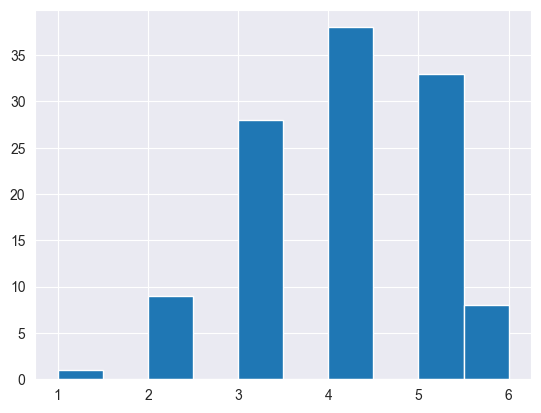

In [43]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', usecols=['roles'])
df.roles.map(eval).map(len).hist()
plt.show()

In [153]:
# pd.crosstab() — аналогично решению выше
contingency_table = pd.crosstab(df.Sex, df.Pclass)
contingency_table

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [13]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
pd.crosstab(df_salary.Type, df_salary.Executor, values=df_salary.Salary, aggfunc='mean')

Executor,Loopa,Pupa
Type,,
A,58.000000,160.833333
B,145.166667,77.000000
C,154.333333,74.500000
D,137.714286,146.500000
E,164.000000,131.200000
F,238.000000,136.250000


In [14]:
table = pd.crosstab(df_salary.Type, df_salary.Executor, values=df_salary.Salary, aggfunc='mean')
table.idxmax()

Executor
Loopa    F
Pupa     A
dtype: object

In [179]:
# train_test_split() — делит выборку на две: обучающую и тестовую
# test_size — доля тестовой выборки
# random_state — параметр перемешивания
# stratify — когда набор данных несбалансирован, рекомендуется проводить стратифицированную выборку
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Survived', 'Sex', 'Pclass'])
random_seed = 2
train, test = train_test_split(df, test_size=0.01, random_state=random_seed, stratify=df['Survived'])
train.head(3)

,Survived,Pclass,Sex
328,1,3,female
443,1,2,female
231,0,3,male


In [16]:
# StandardScaler() — преобразует числа в стандартные скалярные числа
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Age'])
scaler = StandardScaler()
scaler.fit(df[['Age']])
df['Age_scaler'] = scaler.transform(df[['Age']])
df.head(3)

,Age,Age_scaler
0,22.0,-0.547050
1,38.0,0.563552
2,26.0,-0.269400


<AxesSubplot:>

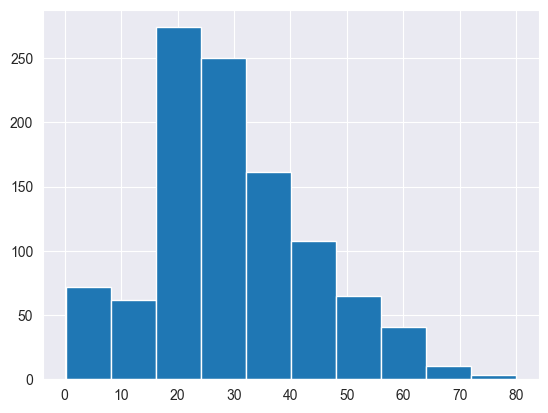

In [17]:
df.Age.hist()

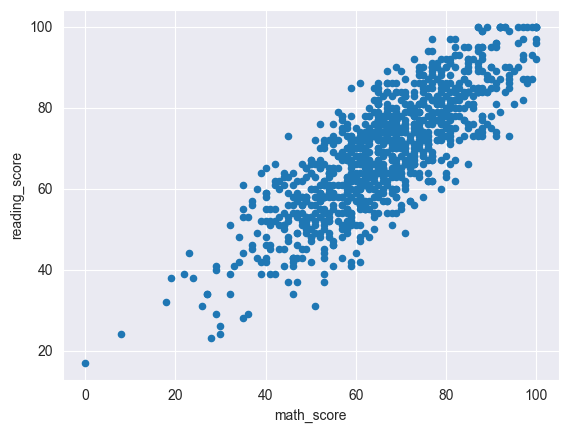

In [19]:
df_stud = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df_stud = df_stud.rename(columns=lambda col: col.replace(" ", "_"))
df_stud.plot.scatter(x='math_score', y='reading_score')
plt.show()

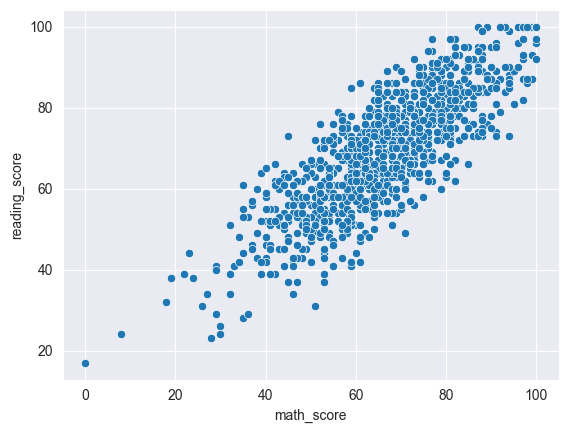

In [21]:
sns.scatterplot(df_stud, x='math_score', y='reading_score')
plt.show()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

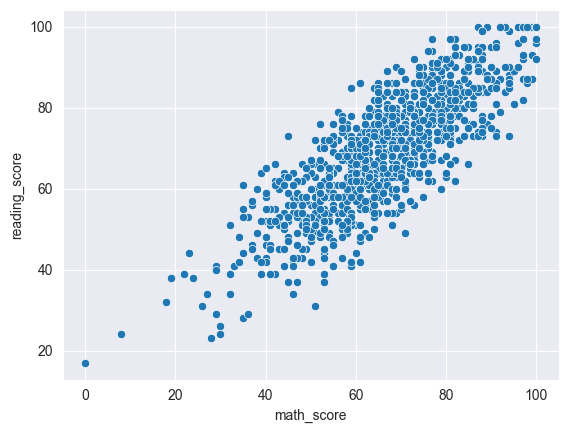

In [23]:
sns.scatterplot(df_stud, x='math_score', y='reading_score')

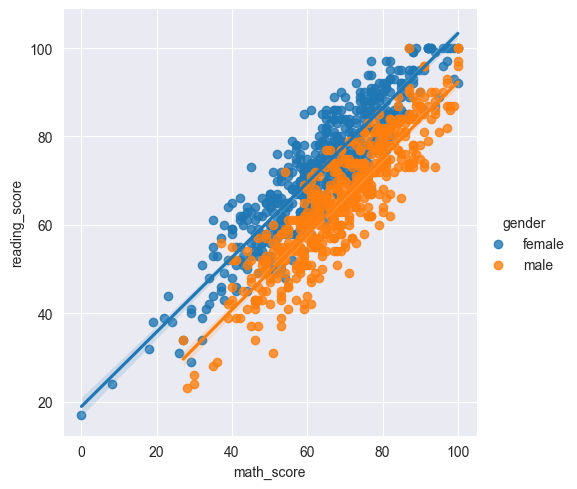

In [25]:
sns.lmplot(df_stud, x='math_score', y='reading_score', hue='gender')
plt.show()

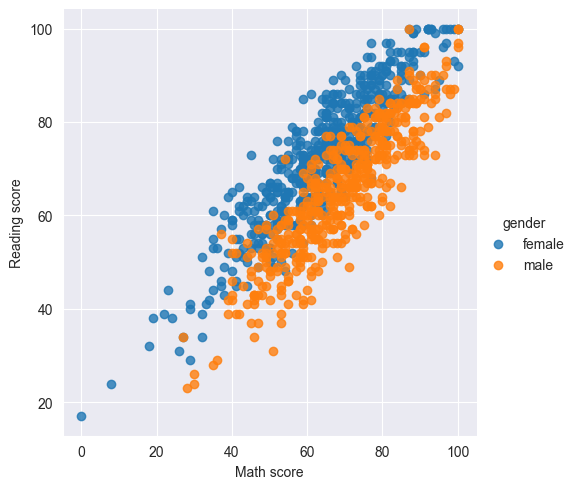

In [26]:
ax = sns.lmplot(df_stud, x='math_score', y='reading_score', hue='gender', fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')
plt.show()

In [27]:
df_month_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df_month_salary.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


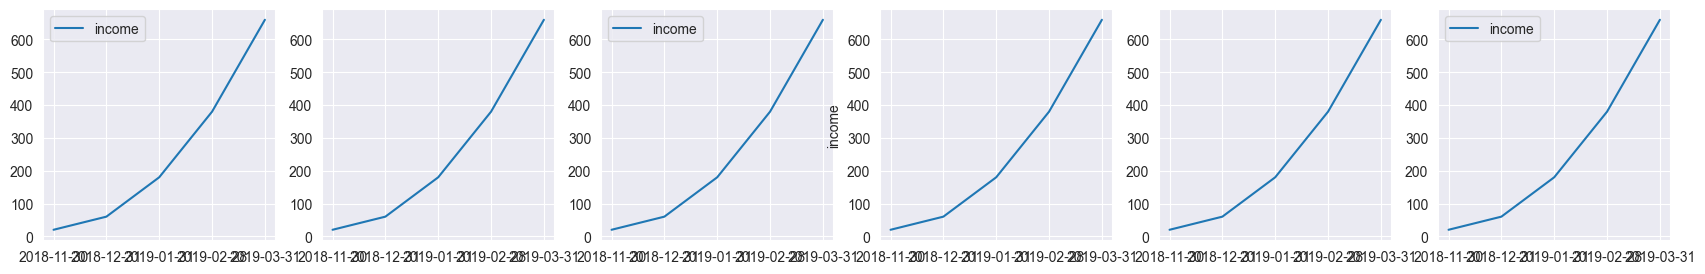

In [38]:
figure, axis = plt.subplots(1, 6, figsize=(21,3))
df_month_salary.plot(kind='line', ax=axis[0])
df_month_salary['income'].plot(ax=axis[1])
sns.lineplot(data=df_month_salary, ax=axis[2])
sns.lineplot(x=df_month_salary.index, y=df_month_salary.income, ax=axis[3])
df_month_salary.income.plot(ax=axis[4])
df_month_salary.plot(ax=axis[5])
plt.show()

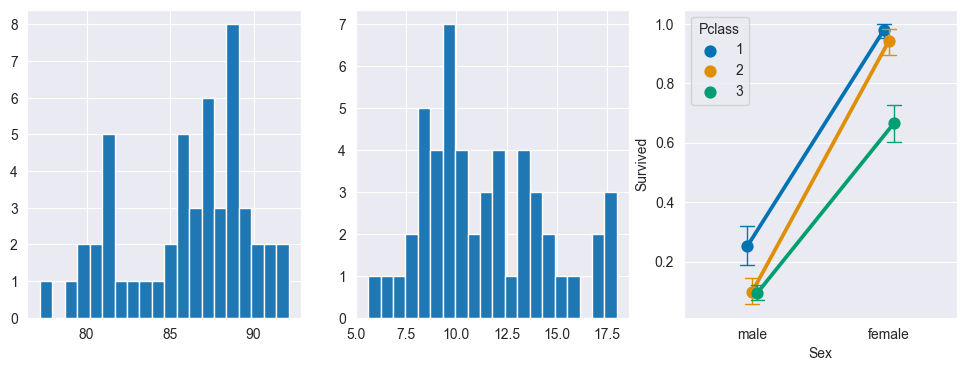

In [220]:
# subplots() — строим несколько графиков
# (ax1, ax2), subplots(1, 3) — количество и расположение графиков, первое число кол-во по горизонтали, второе по вертикали

# hist(x, bin) — строит гистограмму, второе параметр кол-во промежутков
# pointplot() — удобен при двухфакторном дисперсионном анализе
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
x = df['hs_grad']
y = df['poverty']

data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Survived', 'Sex', 'Pclass', 'Age'])

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.hist(x, 20)
ax2.hist(y, 20)
sns.pointplot(data=data, x='Sex', y='Survived', hue='Pclass', dodge=True, capsize=.1, errwidth=1, palette='colorblind', ax=ax3)
plt.show()

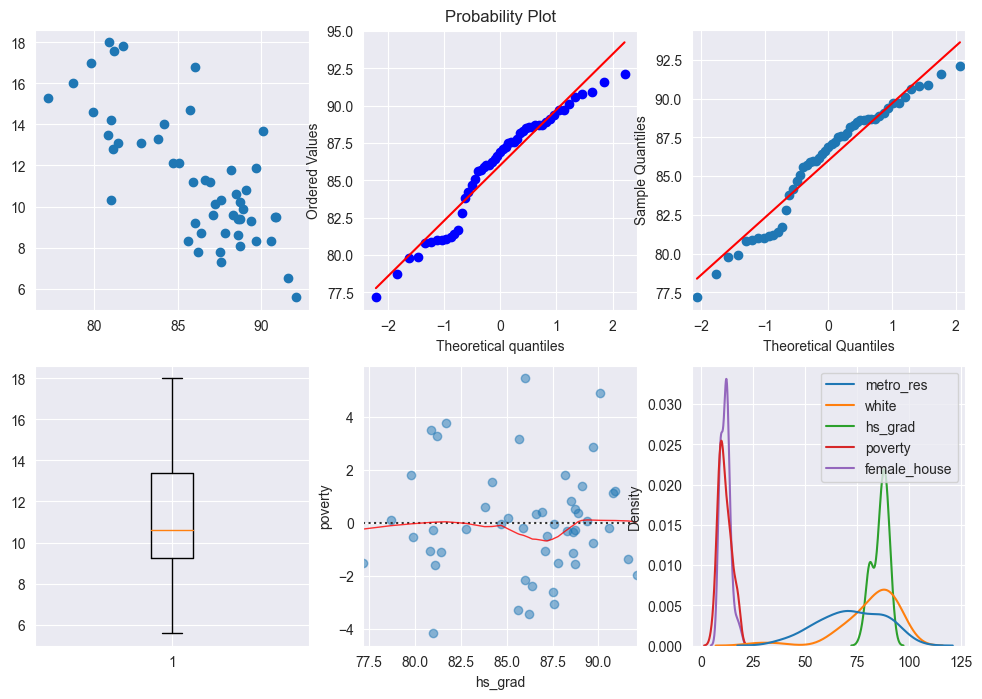

In [217]:
# scatter() —  диаграмма рассеяния
# probplot(x, dist="norm") — QQ plot
# qqplot() — QQ plot
# boxplot() — boxplot, ящик с усами, диаграмма размаха
# residplot() — график остатков
# kdeplot() — график плотности

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,8))
ax1.scatter(x, y)
stats.probplot(x, dist="norm", plot=ax2)
sm.qqplot(x, line='s', ax=ax3)
ax4.boxplot(y)
sns.residplot(x=x, y=y, data=df, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax5)
sns.kdeplot(df, ax=ax6)

plt.show()

/Users/mitya/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


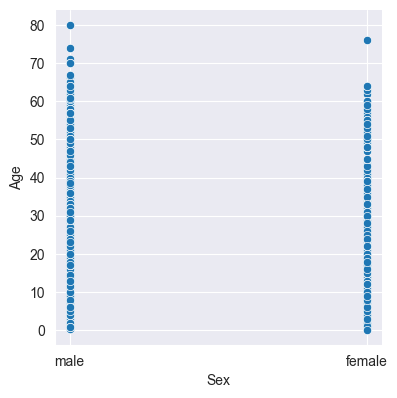

In [224]:
# график парных взаимосвязей
sns.pairplot(data, y_vars="Age", x_vars=['Sex'], size=4)
plt.show()

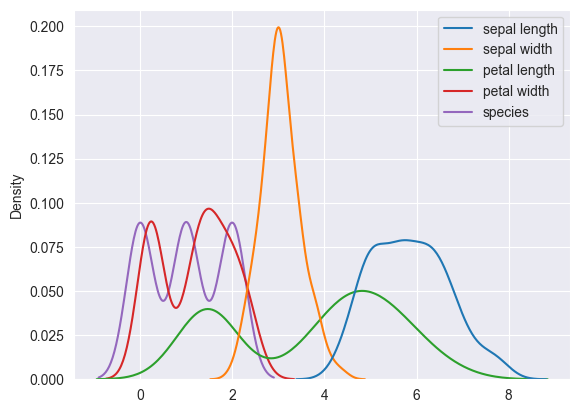

In [44]:
fl_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
sns.kdeplot(fl_df)
plt.show()

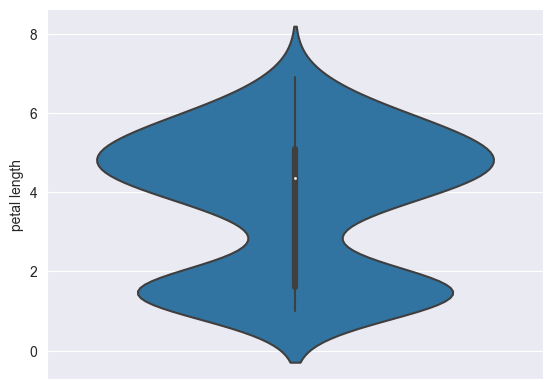

In [46]:
sns.violinplot(fl_df, y='petal length')
plt.show()

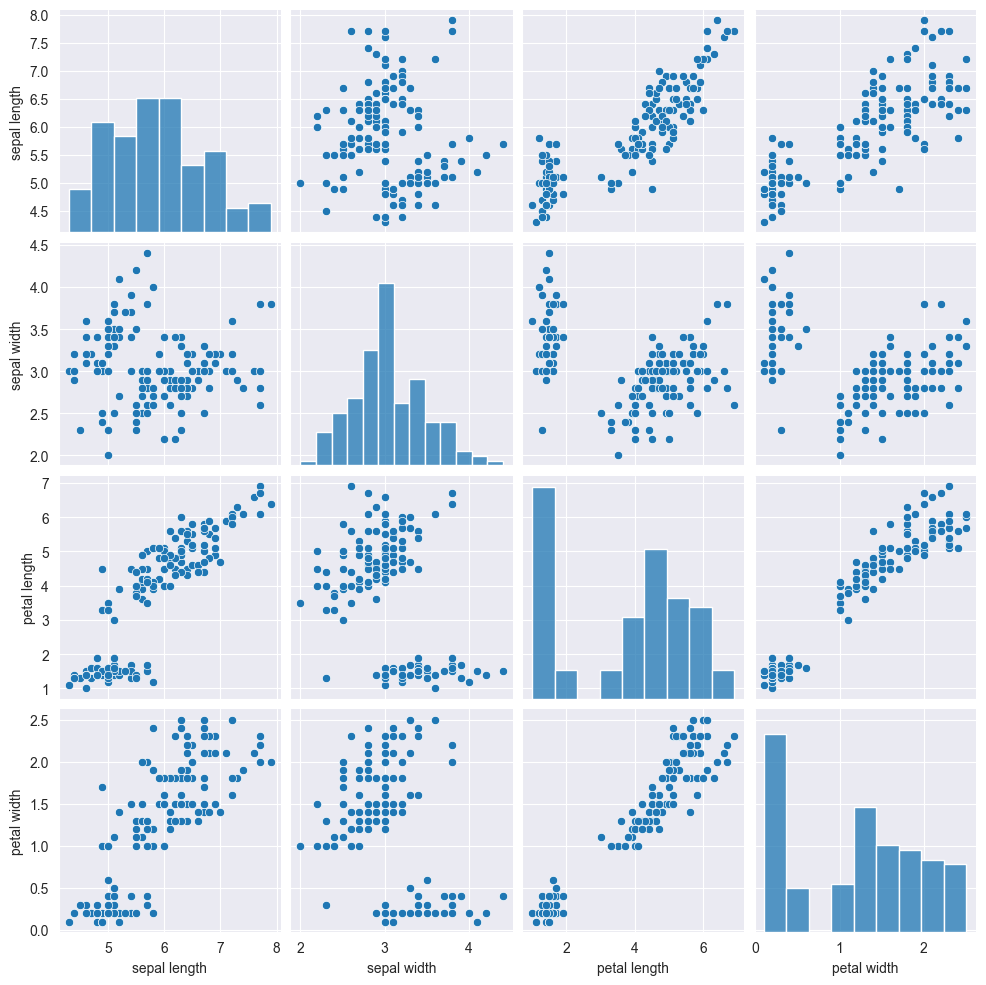

In [47]:
sns.pairplot(fl_df.drop('species', axis=1))
plt.show()

<AxesSubplot:>

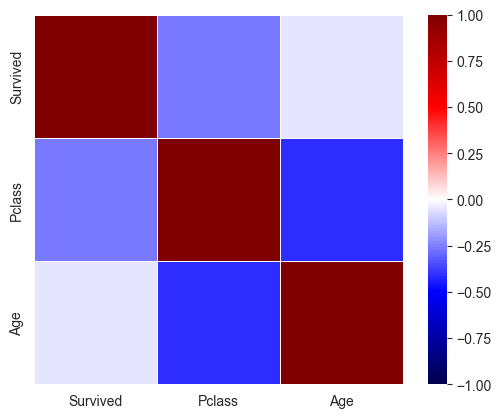

In [222]:
# тепловая карта
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, cmap='seismic', square=True, linewidths=.5, annot=False, fmt=".2f")

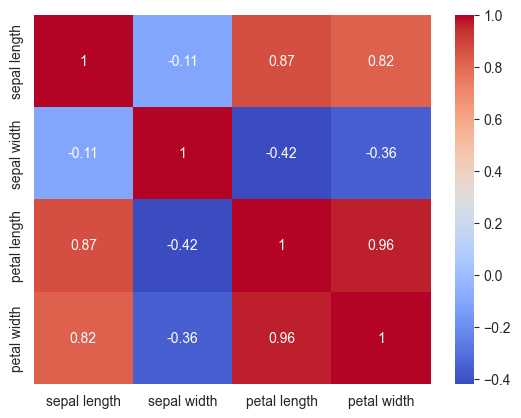

In [49]:
sns.heatmap(fl_df.drop('species', axis=1).corr(), cmap= 'coolwarm', annot=True)
plt.show()